### 빅데이터분석개론 토픽9

- 2024 . 07 . 01 

----------

#### 9단원. 텍스트 처리

- 텍스트 구분
    - 구조화된 문서 (XML, HTML, CSV, JSON)
    - 구조화되지 않은 문서 (자연어로 된 텍스트)
    
<br>

- 텍스트 처리 모듈 : BeautifulSoup, csv, json, nltk
- re : 정규식 처리 (내부 라이브러리)

In [5]:
# 기본적인 텍스트 처리 : 문자열 슬라이싱

sentence = 'monty python'
print (sentence[0:6])
print (sentence[6:])
print (sentence[-6:])

monty 
python
python


In [11]:
# split

sentence = '''daramji is a girl, princess, and lovely animal.
daramji is very cute, adorable.
daramji! daramji! daramji! daramji! daramji!'''

rst = sentence.split() # 빈칸 기준
print (rst)

rst = sentence.split('.') # 온점 기준
print (rst)

rst = sentence.split('\n') # 개행 기준
print (rst)

['daramji', 'is', 'a', 'girl,', 'princess,', 'and', 'lovely', 'animal.', 'daramji', 'is', 'very', 'cute,', 'adorable.', 'daramji!', 'daramji!', 'daramji!', 'daramji!', 'daramji!']
['daramji is a girl, princess, and lovely animal', '\ndaramji is very cute, adorable', '\ndaramji! daramji! daramji! daramji! daramji!']
['daramji is a girl, princess, and lovely animal.', 'daramji is very cute, adorable.', 'daramji! daramji! daramji! daramji! daramji!']


In [13]:
# strip과 split을 이용하여 공백이 많을 때 처리가 손쉽게 가능
sentence = "welcome ,  to  , animal , world"
print ([char.strip() for char in sentence.split(',')])

['welcome', 'to', 'animal', 'world']


In [1]:
# 여러개의 문자열을 이어붙이기
pokemon = ['pachiritsu', 'dedenne', 'moraedooji']
phone_number = '010.0000.0000'

print(', '.join(pokemon)) # 사이사이에 , 붙음
print('-'.join(phone_number.split('.'))) # .을 -로 바꾸기 -> replace로도 가능

sentence = list('hello world')
print (sentence) # 한글자씩
print(''.join(sentence)) # 붙이기

pachiritsu, dedenne, moraedooji
010-0000-0000
['h', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd']
hello world


In [17]:
# lower, upper, capitalize

word = 'PytHOn'
print (word.lower())
print (word.upper())
print (word.capitalize()) # 첫번째 문자만 대문자

python
PYTHON
Python


In [20]:
# strip : 앞뒤로 특정 문자를 제거

sentence = '''wow wow wow
there is daramji
daramji! daramji! daramji! daramji! daramji!
'''

words = sentence.split()

for i in range (len(words)) :
    words[i] = words[i].strip()
    words[i] = words[i].rstrip('!')
    
print (words)

['wow', 'wow', 'wow', 'there', 'is', 'daramji', 'daramji', 'daramji', 'daramji', 'daramji', 'daramji']


In [22]:
# find, count, len

address = "www.github.com/lky473736"
print (address.find('lky473736')) # 특정 문자열이 시작되는 위치
print (address.count('.'))
print (len(address))

15
2
24


In [24]:
# ord : 특정 문자의 유니코드 값을 얻을 수 있음 (10진수로 return)
# chr : 유니코드 값을 입력하면 문자 반환

for i in range (54, 65) :
    char = chr(i)
    print (char, ord(char))

6 54
7 55
8 56
9 57
: 58
; 59
< 60
= 61
> 62
? 63
@ 64


---------

In [25]:
# string 모듈 이용

# 알파벳 대소문자 출력하기 (내장되어 있음)

import string 

ascii_upper = string.ascii_uppercase
ascii_lower = string.ascii_lowercase
print (ascii_upper, ascii_lower)

ABCDEFGHIJKLMNOPQRSTUVWXYZ abcdefghijklmnopqrstuvwxyz


In [29]:
# 카이사르 암호 만들기

import string

ascii_upper = string.ascii_uppercase
dicta = {}
i = 3

for alphabet in ascii_upper :
    dicta[alphabet] = ascii_upper[i % 24]
    i += 1

print (dicta)

src = input("문장을 입력하세요 : ")
for char in src : 
    try : 
        print (dicta[char], end = '')
        
    except KeyError : 
        print (char, end = '')

{'A': 'D', 'B': 'E', 'C': 'F', 'D': 'G', 'E': 'H', 'F': 'I', 'G': 'J', 'H': 'K', 'I': 'L', 'J': 'M', 'K': 'N', 'L': 'O', 'M': 'P', 'N': 'Q', 'O': 'R', 'P': 'S', 'Q': 'T', 'R': 'U', 'S': 'V', 'T': 'W', 'U': 'X', 'V': 'A', 'W': 'B', 'X': 'C', 'Y': 'D', 'Z': 'E'}
문장을 입력하세요 : ATTACK ON MIDNIGHT
DWWDFN RQ PLGQLJKW

In [32]:
# 트위터 메세지 처리 단어 갯수 추출

t = "There's a reason some people are working to make it harder to vote, especially for people of color. It's because when we show up, things change."
print (len(t.split()))

26


--------

- wordcloud
    - matplotlib, pandas, wordcloud 모듈 필요
    - pip로 설치 
    - wikipedia 모듈 또한 설치

In [34]:
import wikipedia

wiki = wikipedia.page('Artificial Intelligence') # 컨텐츠 제목을 명시하여 page 가져오기
text = wiki.content # 본문 가져옴 
print (text[:1000])

Artificial intelligence (AI), in its broadest sense, is intelligence exhibited by machines, particularly computer systems. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals. Such machines may be called AIs.
Some high-profile applications of AI include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); interacting via human speech (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., ChatGPT, Apple Intelligence, and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). However, many AI applications are not perceived as AI: "A lot of cutting edge AI has filtered into general applications, often without being called AI because once something be

In [45]:
from wordcloud import WordCloud

# 워드 클라우드 생성
wordcloud = WordCloud (width = 2000, height = 1500, stopwords=wordcloud.stopwords).generate(text) # stopwords == 불용어 사전

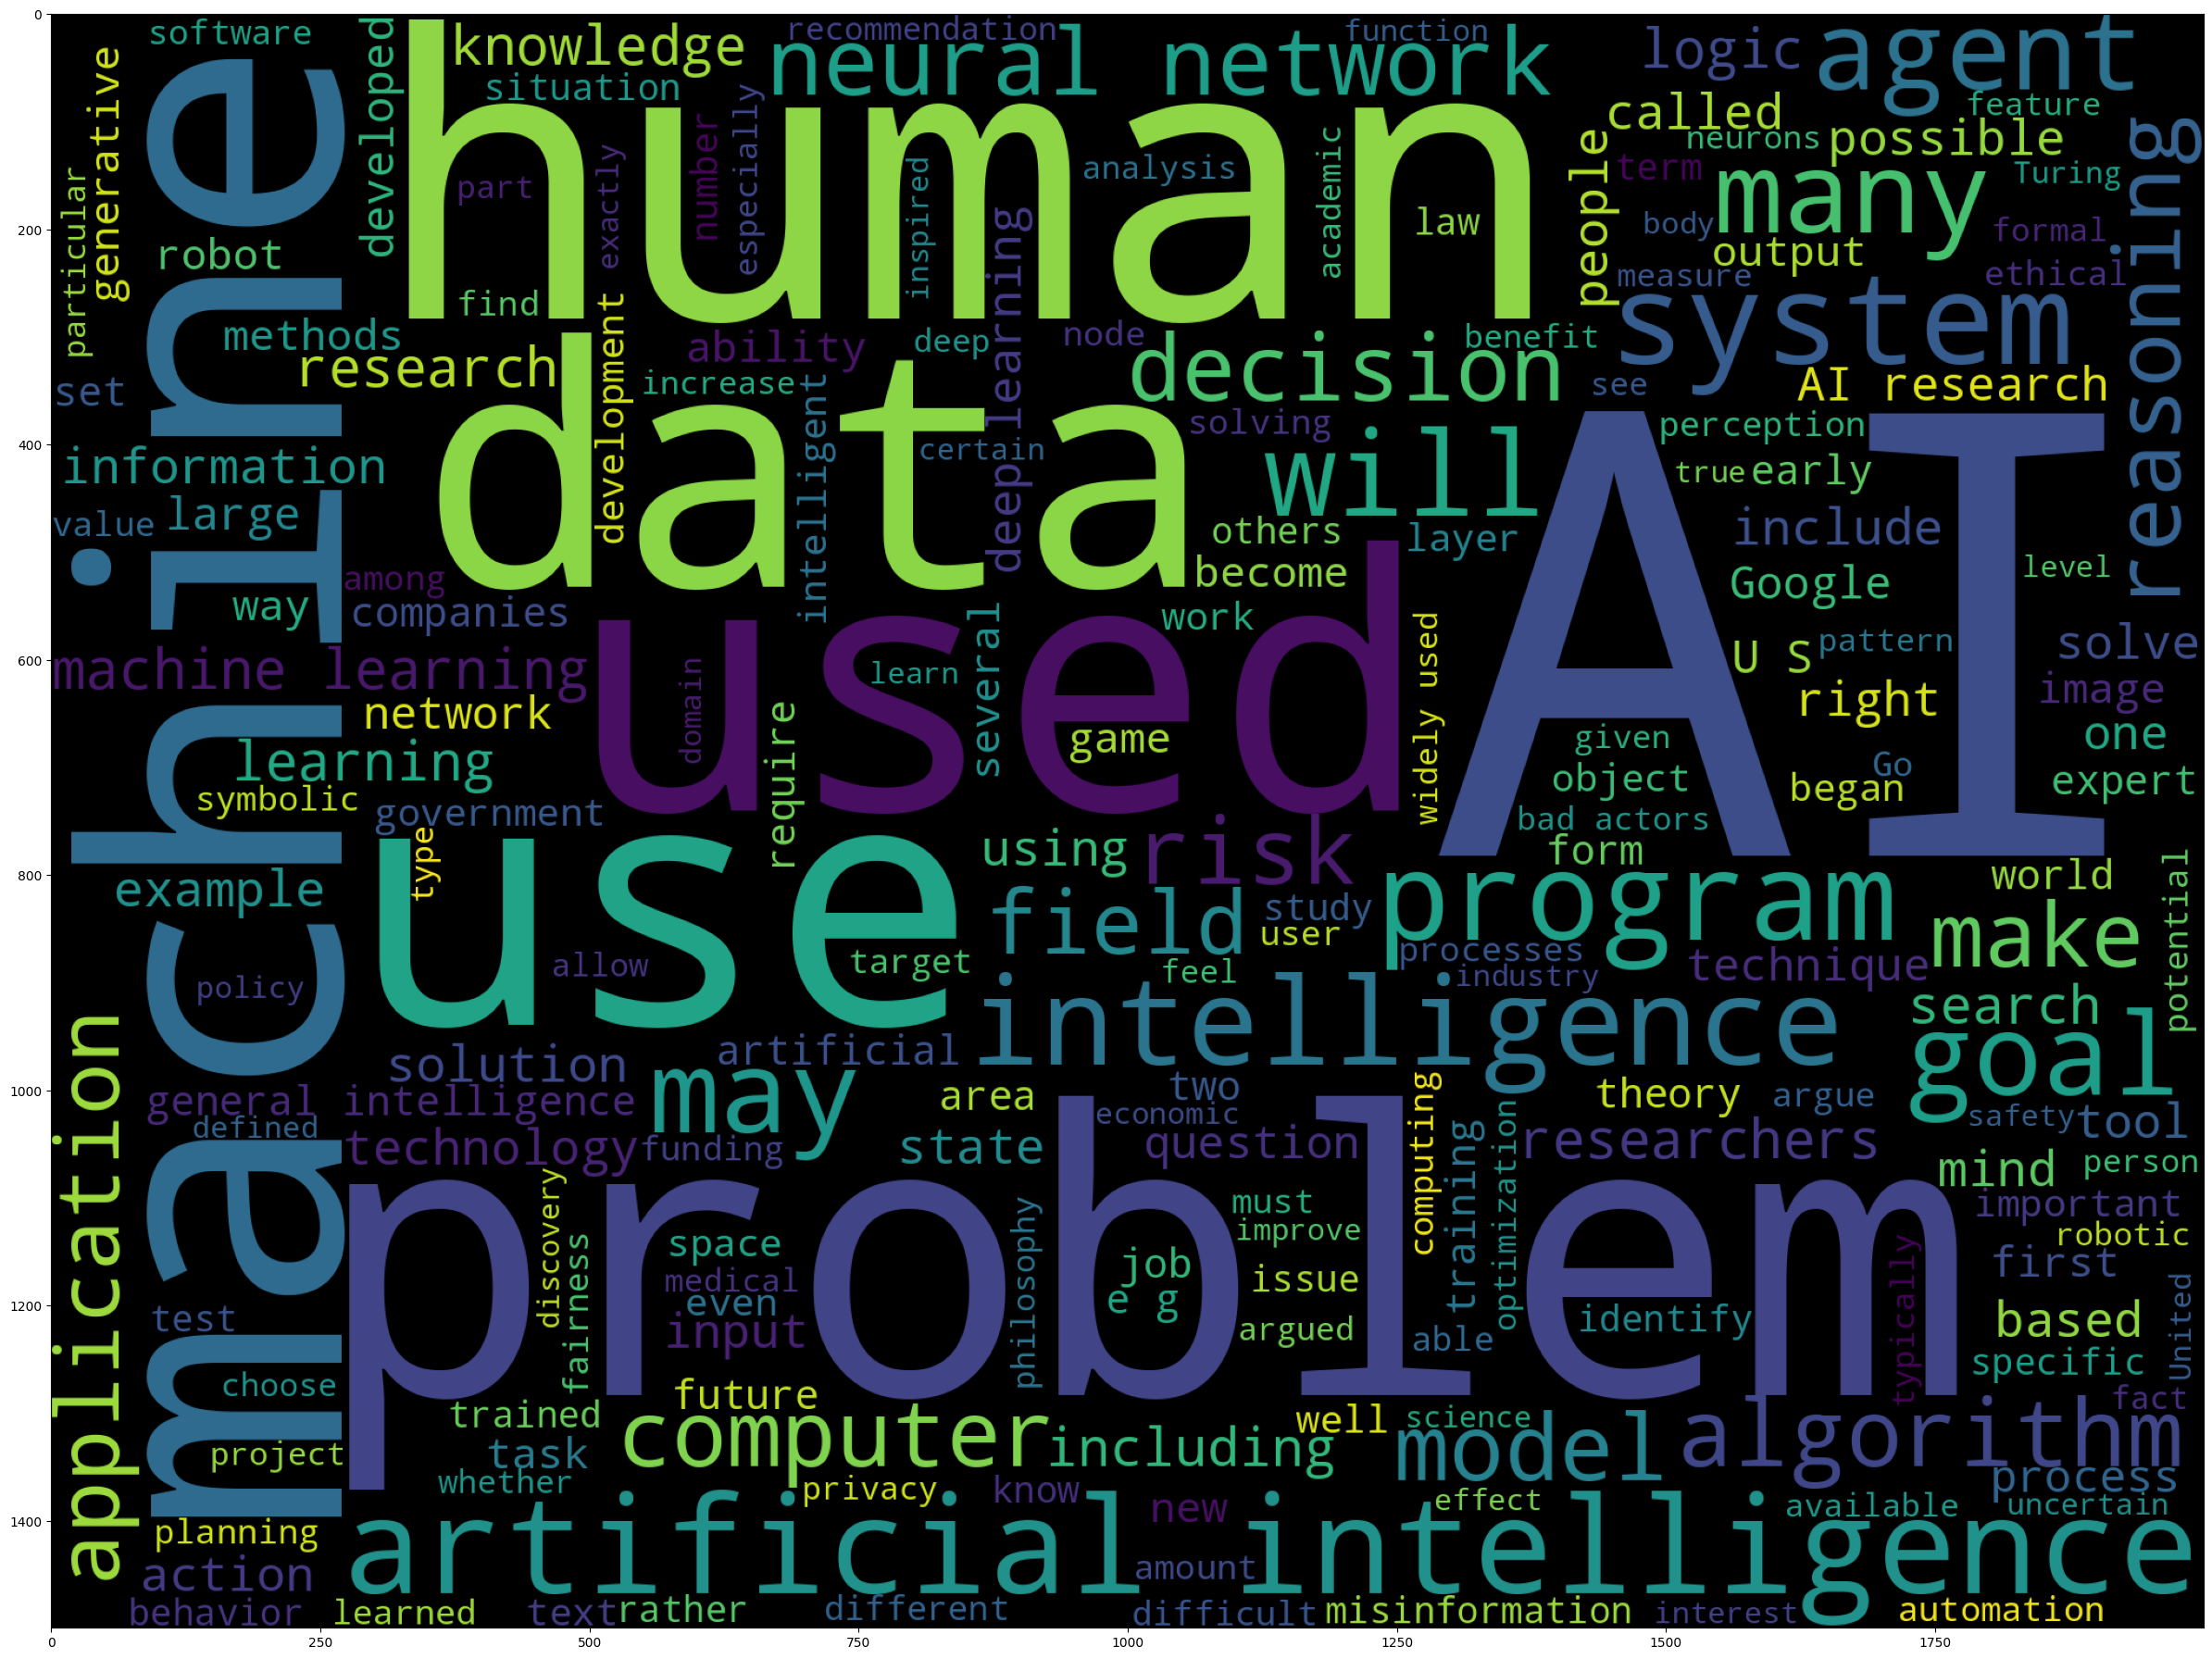

In [46]:
# 생성한 워드 클라우드를 matplotlib으로 보여주기

import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))
plt.imshow(wordcloud)
plt.show()

------

- 정규식 
    - 특정한 규칙을 포함한 문자열인지 검사하기 위한 식

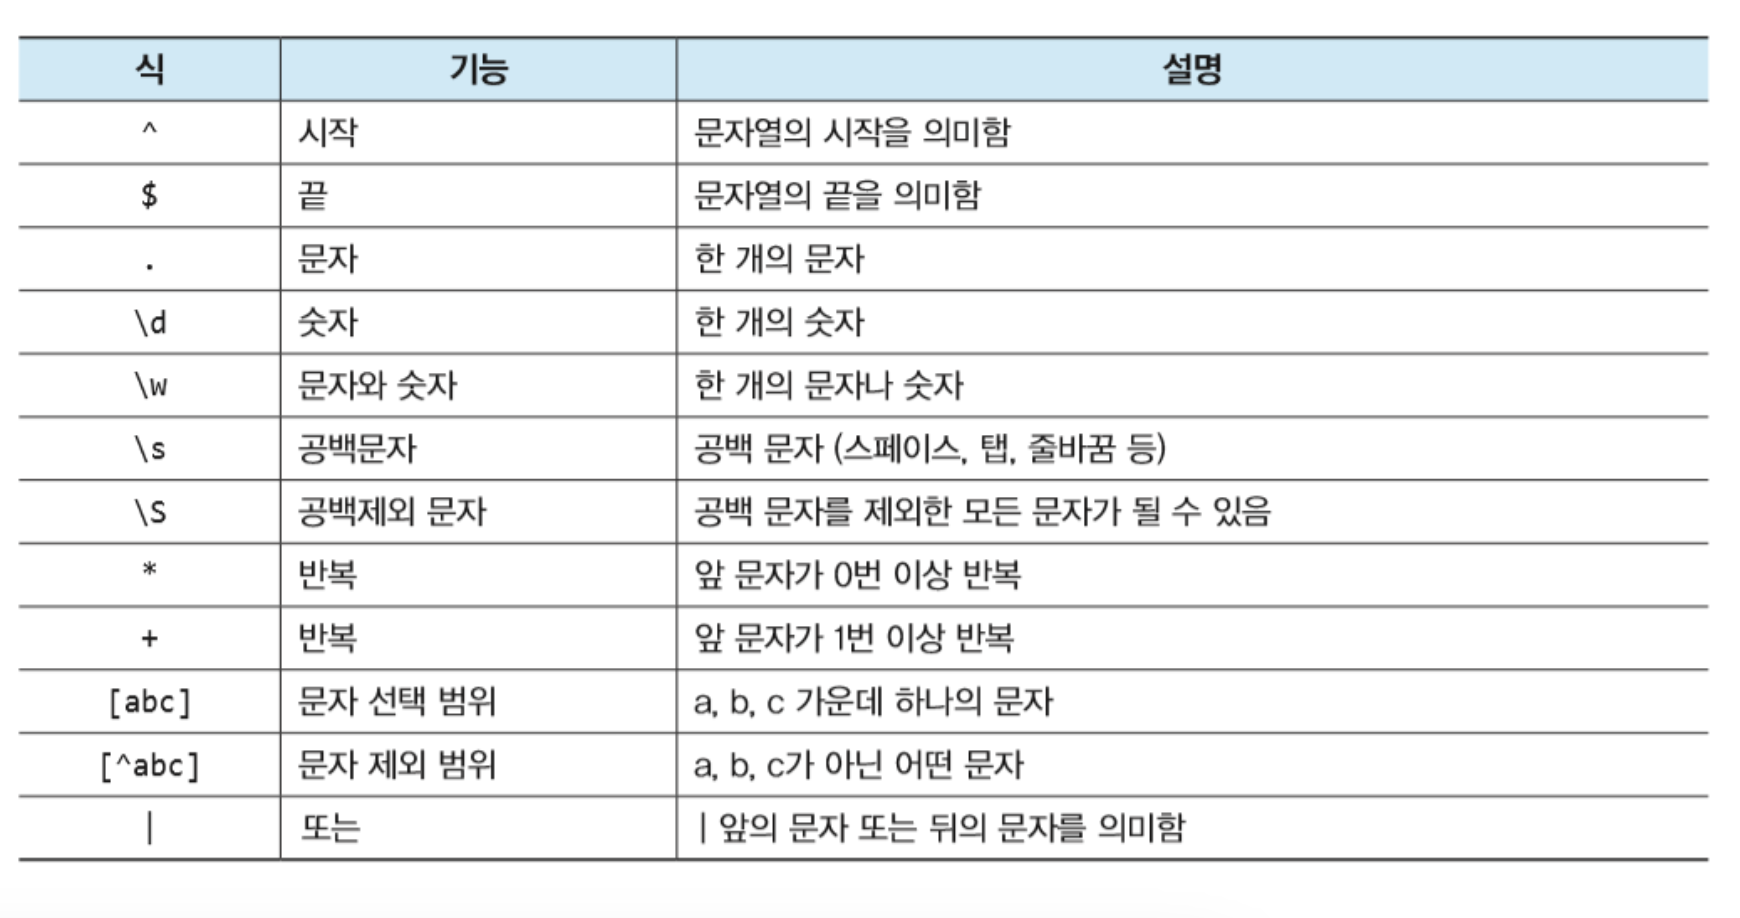

In [48]:
import re # 정규식 사용하기 위해 re 불러오기
txt1 = 'Life is too short, you need python'
print (re.search('Life', txt1)) # Life라고 하는 텍스트가 있느냐
print (re.search('daramji', txt1)) # 없으면 None

<re.Match object; span=(0, 4), match='Life'>
None


In [49]:
# group, start, end, span
match = re.search('Life', txt1)

print (match.start()) # 찾았으면 찾은 인덱스
print (match.end()) # 찾은 인덱스 + 단어 길이
print (match.span()) # 범위
print (txt1[0:4])

0
4
(0, 4)
Life


In [51]:
# 2개 이상의 조건

match = re.search ('Life|life', txt1) # |을 통하여 '또한'을 표현 (Life 혹은 life를 찾아라)
match = re.search ('[Ll]ife', txt1) # [] : 문자 선택의 범위를 표현 (위와 동일한 표현)
match = re.search ('[0-9]', txt1) # 숫자 찾기

# [], -, |와 같이 특별한 의미를 가지는 문자들을 meta character라고 함

In [52]:
# ^, $

match = re.search ('^Life', txt1) # 첫 단어에 Life가 있나?
# 만약에 중간에 Life라고 하는 단어가 있으면 None 배출

match = re.search ('python$', txt1) # 마지막 단어에 python이 있나?
# 마찬가지임

In [53]:
# .

print (re.search('da.ji', 'daramji')) # none
print (re.search('da..ji', 'daramji')) # none
print (re.search('da...ji', 'daramji')) 

# .은 문자 한개를 의미

None
None
<re.Match object; span=(0, 7), match='daramji'>


In [58]:
# * -> 패턴이 '0'회 이상 반복되는 문자와 매치 (0회 이상인 것을 주의)

print (re.search('AB*', 'A'))
print (re.search('AB*', 'AA'))
print (re.search('ABB*', 'AAAAAABBAAAADFAF'))
print (re.search('DBB*', 'ABDD'))

<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(5, 8), match='ABB'>
None


In [62]:
# ? -> 0회 또는 1회 (없거나, 한번만 있거나)

print (re.search ('AB?', 'A'))
print (re.search ('AB?', 'ABB'))
print (re.search ('AB?', 'AC'))

<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 2), match='AB'>
<re.Match object; span=(0, 1), match='A'>


In [64]:
# + : 1회 이상
print (re.search ('AB+', 'AAA'))

None


In [66]:
# 인권선언문의 특정 항들만 가져오기

import re

f = open('data/UNDHR.txt', 'r')

for line in f : 
    line = line.rstrip()
    
    if re.search('^\([0-9]+\)',line) :
        print (line)

(1) Everyone charged with a penal offence has the right to be presumed innocent until proved guilty according to law in a public trial at which he has had all the guarantees necessary for his defence.
(2) No one shall be held guilty of any penal offence on account of any act or omission which did not constitute a penal offence, under national or international law, at the time when it was committed. Nor shall a heavier penalty be imposed than the one that was applicable at the time the penal offence was committed.
(1) Everyone has the right to freedom of movement and residence within the borders of each state.
(2) Everyone has the right to leave any country, including his own, and to return to his country.
(1) Everyone has the right to seek and to enjoy in other countries asylum from persecution.
(2) This right may not be invoked in the case of prosecutions genuinely arising from non-political crimes or from acts contrary to the purposes and principles of the United Nations.
(1) Everyon

In [68]:
# sub : 특정 문자열을 다른 문자열로 대체

import re 
sentence = "daramji is cute"
sentence = re.sub ('cute', 'adorable', sentence) # cute를 adorable로
print (sentence)

daramji is adorable
